<a href="https://colab.research.google.com/github/Abhilashkumar041/Abhilash041/blob/main/Customer_curn_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od

In [62]:
od.download("https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann")

Skipping, found downloaded files in "./deep-learning-az-ann" (use force=True to force download)


In [207]:
df = pd.read_csv("/content/deep-learning-az-ann/Churn_Modelling.csv")

In [208]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [209]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 **Data Pre-Processing & EDA(Exprolatory Data Analysis) **

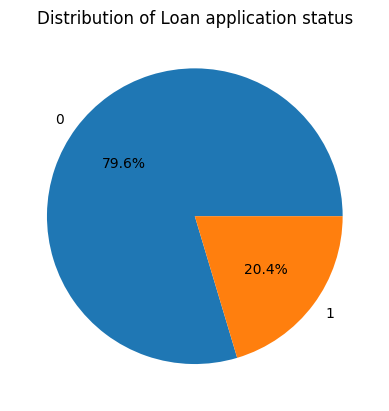

In [211]:
### Checking the Loan application status acceptance details.

value_counts = df["Exited"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loan application status')
plt.show()

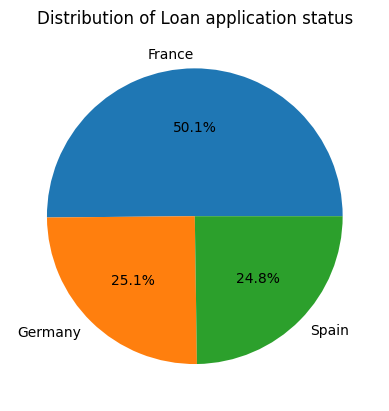

In [212]:
### Checking the countries values

value_counts = df["Geography"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loan application status')
plt.show()

In [213]:
## Data Pre Processing Steps

In [214]:
### Dropping the irrelevant columns which is of no use

df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)


In [215]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


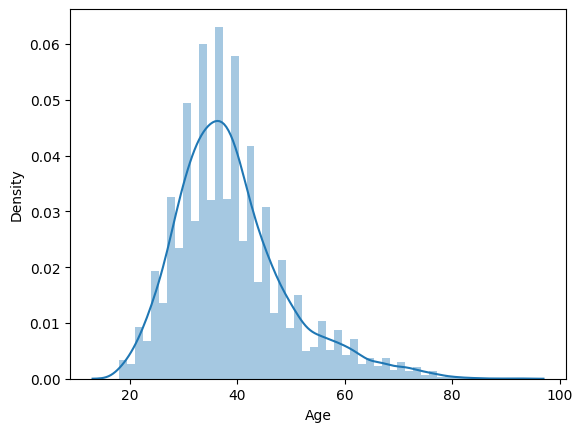

In [216]:
### Checking the Age Distribution

sns.distplot(df["Age"],kde=True)
plt.show()

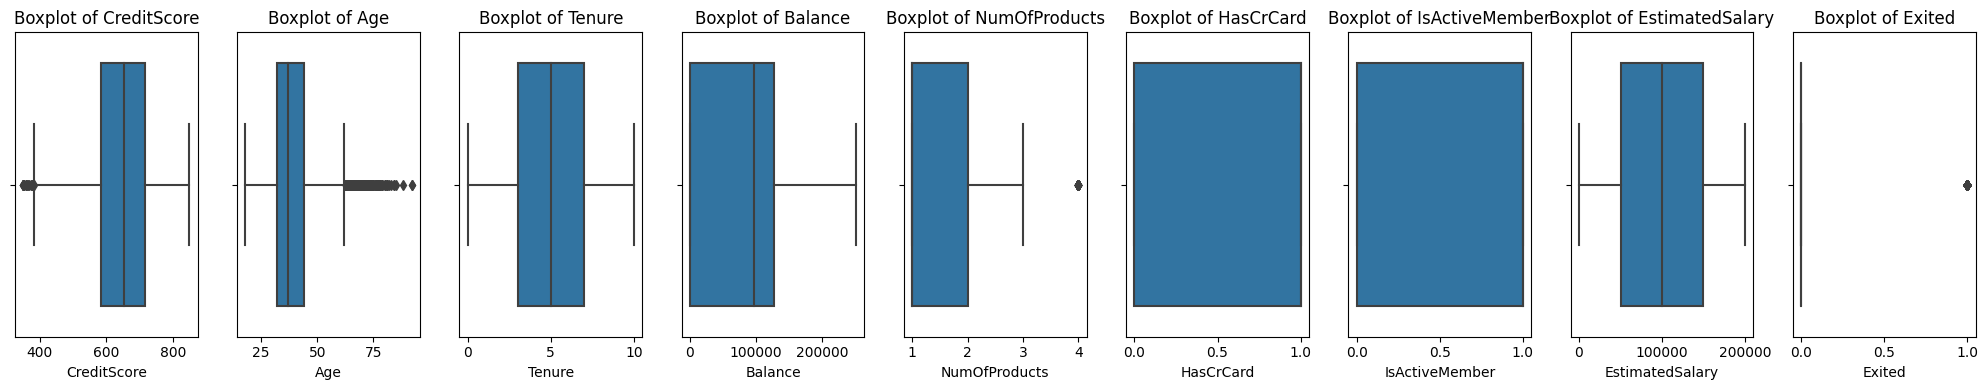

In [217]:
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns

fig, ax = plt.subplots(ncols=len(numerical_cols), figsize=(20, 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")
    ax[i].set_xlabel(col)
plt.tight_layout()
plt.show()


In [218]:
### Data have few outliers so dealing with them first

In [219]:
### Seprating the Dependent and Independnt Variables first

X = df.drop("Exited", axis=1)
y = df["Exited"]

In [220]:
### Few Colums have some outliers as per the Box Plot graphical views so dealing with a columns which have some outliers

In [221]:
from scipy import stats

z_scores = stats.zscore(df[['CreditScore', 'Age']])
threshold = 3
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

outliers_df = pd.DataFrame(df[['CreditScore', 'Age']].iloc[outlier_indices], columns=['CreditScore', 'Age'])
outliers_df.head()

,CreditScore,Age
85,652,75
158,646,73
230,673,72
252,681,79
310,652,80


In [222]:
outliers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,141.0,645.205674,115.206059,350.0,597.0,653.0,714.0,850.0
Age,141.0,73.390071,7.272034,39.0,72.0,74.0,76.0,92.0


In [223]:
X[['CreditScore', 'Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Age,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0


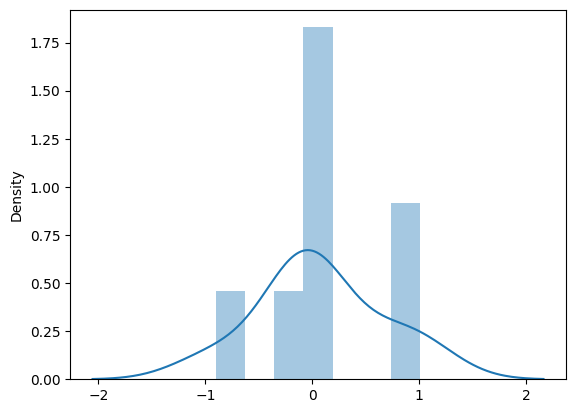

In [224]:
### Checking the Dataset Skewness

sns.distplot(X.skew(),kde=True)
plt.show()

In [225]:
### Data is normally distributes so filling outliers with mean

for column in ['CreditScore', 'Age']:
    outliers = outliers_df[column].index
    original_outliers = X.loc[outliers, column]
    filled_outliers = X.loc[outliers, column].mean()

    print(f"Original outliers in column '{column}':")
    print(original_outliers)

    print(f"Filled outliers in column '{column}':")
    print(filled_outliers)

    print('\n')


Original outliers in column 'CreditScore':
85      652
158     646
230     673
252     681
310     652
       ... 
9646    850
9671    649
9736    659
9894    521
9936    609
Name: CreditScore, Length: 141, dtype: int64
Filled outliers in column 'CreditScore':
645.2056737588653


Original outliers in column 'Age':
85      75
158     73
230     72
252     79
310     80
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: Age, Length: 141, dtype: int64
Filled outliers in column 'Age':
73.39007092198581




In [226]:
print(X.shape)
X.head()

(10000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [227]:
### Dealing with Catagorical values

X = pd.get_dummies(X,columns=['Geography','Gender'],drop_first=True)

In [228]:
### Spliting the data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [229]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (6700, 11)
Shape of the training output data: (6700,)
Shape of the test input data: (3300, 11)
Shape of the test output data: (3300,)


In [230]:
### Scaling the data using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [231]:
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-0.53150066, -0.66802418, -0.72407216, ...,  1.68705478,
        -0.56148468,  0.91958555],
       [-0.25478739,  0.38332105, -1.41576072, ..., -0.59274898,
        -0.56148468,  0.91958555],
       [-0.48025747,  0.47889789, -0.37822788, ..., -0.59274898,
         1.78099249, -1.0874464 ],
       ...,
       [-0.60324114, -0.76360102,  1.6968378 , ..., -0.59274898,
        -0.56148468, -1.0874464 ],
       [-2.15078573,  2.00812732,  0.65930496, ..., -0.59274898,
        -0.56148468,  0.91958555],
       [ 0.58560106,  0.67005157, -0.37822788, ...,  1.68705478,
        -0.56148468, -1.0874464 ]])

**Creating ANN (Artificial Neural Network) model **

In [232]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [233]:
model = Sequential()
model

In [234]:
### Input Layer
model.add(Dense(64,activation="sigmoid",input_dim=11))

### Hidden Layer
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

### Output Layer
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                768       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trai

In [235]:
### Compiling the mode

model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [236]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
108/108 [==============================] - 3s 8ms/step - loss: 0.5152 - accuracy: 0.7905 - val_loss: 0.4946 - val_accuracy: 0.7978
Epoch 2/100
108/108 [==============================] - 1s 7ms/step - loss: 0.5094 - accuracy: 0.7905 - val_loss: 0.4942 - val_accuracy: 0.7978
Epoch 3/100
108/108 [==============================] - 1s 7ms/step - loss: 0.5105 - accuracy: 0.7905 - val_loss: 0.4929 - val_accuracy: 0.7978
Epoch 4/100
108/108 [==============================] - 1s 6ms/step - loss: 0.5082 - accuracy: 0.7905 - val_loss: 0.4959 - val_accuracy: 0.7978
Epoch 5/100
108/108 [==============================] - 0s 5ms/step - loss: 0.5074 - accuracy: 0.7905 - val_loss: 0.4948 - val_accuracy: 0.7978
Epoch 6/100
108/108 [==============================] - 1s 5ms/step - loss: 0.5073 - accuracy: 0.7905 - val_loss: 0.4943 - val_accuracy: 0.7978
Epoch 7/100
108/108 [==============================] - 1s 5ms/step - loss: 0.5060 - accuracy: 0.7905 - val_loss: 0.4933 - val_accuracy: 0.7978

In [237]:
### Checking the prediction

y_pred = model.predict(X_test)

104/104 [==============================] - 0s 2ms/step


In [238]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [239]:
### Checking the actual and predicted values

y_pred = y_pred.reshape(-1)
pd.DataFrame(data={"Actual": y_test, "Prediction": y_pred})

,Actual,Prediction
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
1744,0,0
9754,0,0
6094,0,0
8781,0,0


In [240]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8051515151515152

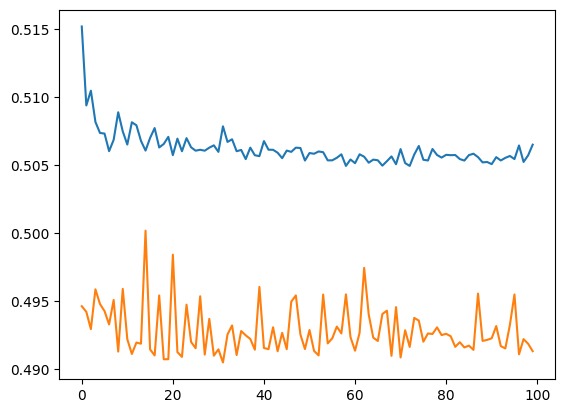

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

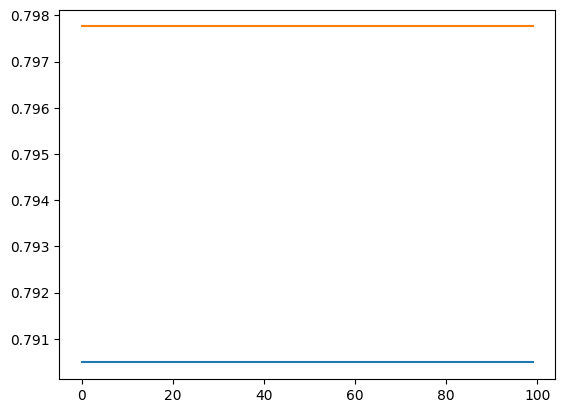

In [242]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])